# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ignatius Wiradhi Kristianto
- **Email:** adhi180599@gmail.com
- **ID Dicoding:** Ignatius Wiradhi Kristianto

## Menentukan Pertanyaan Bisnis

- Bagaimana musim dan situasi cuaca tertentu mempengaruhi tingkat penyewaan sepeda selama dua tahun berjalan?

- Kapankah tingkat penyewaan sepeda mencapi titik tertinggi dan terendah selama dua tahun berjalan?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_ds = pd.read_csv("https://raw.githubusercontent.com/adhi870/Bike_Sharing-Dicoding_Academy_Final_Project/main/day.csv")
hour_ds = pd.read_csv("https://raw.githubusercontent.com/adhi870/Bike_Sharing-Dicoding_Academy_Final_Project/main/hour.csv")

### Assessing Data

In [ ]:
day_ds.info()
print("Jumlah Missing Value:\n", day_ds.isnull().sum())
print("Jumlah Duplikasi:", day_ds.duplicated().sum())

hour_ds.info()
print("Jumlah Missing Value:\n", hour_ds.isnull().sum())
print("Jumlah Duplikasi:", hour_ds.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah Missing Value:
 instant       0
dteday        0
season        0
yr            0
mnth  

### Cleaning Data

In [ ]:
#Changing the values in day_ds
day_ds.loc[day_ds.yr == 0, 'yr'] = 2011
day_ds.loc[day_ds.yr == 1, 'yr'] = 2012

day_ds.loc[day_ds.season == 1, 'season'] = "Springer"
day_ds.loc[day_ds.season == 2, 'season'] = "Summer"
day_ds.loc[day_ds.season == 3, 'season'] = "Fall"
day_ds.loc[day_ds.season == 4, 'season'] = "Winter"

day_ds.loc[day_ds.weathersit == 1, 'weathersit'] = "Clear/Partly Cloudy"
day_ds.loc[day_ds.weathersit == 2, 'weathersit'] = "Mist/Few Clouds"
day_ds.loc[day_ds.weathersit == 3, 'weathersit'] = "Light Snow/Rain"
day_ds.loc[day_ds.weathersit == 4, 'weathersit'] = "Heavy Rain/Thunderstorm"

#Changing the values in hour_ds
hour_ds.loc[hour_ds.yr == 0, 'yr'] = 2011
hour_ds.loc[hour_ds.yr == 1, 'yr'] = 2012

hour_ds.loc[hour_ds.season == 1, 'season'] = "Springer"
hour_ds.loc[hour_ds.season == 2, 'season'] = "Summer"
hour_ds.loc[hour_ds.season == 3, 'season'] = "Fall"
hour_ds.loc[hour_ds.season == 4, 'season'] = "Winter"

hour_ds.loc[hour_ds.weathersit == 1, 'weathersit'] = "Clear/Partly Cloudy"
hour_ds.loc[hour_ds.weathersit == 2, 'weathersit'] = "Mist/Few Clouds"
hour_ds.loc[hour_ds.weathersit == 3, 'weathersit'] = "Light Snow/Rain"
hour_ds.loc[hour_ds.weathersit == 4, 'weathersit'] = "Heavy Rain/Thunderstorm"

#Changing dtype of "dtedate" from object to datetime in day_ds
day_dtetime_columns = ["dteday"]
for dteday in day_dtetime_columns:
  day_ds["dteday"] = pd.to_datetime(day_ds["dteday"])

#Changing dtype of "dtedate" and "hr" to datetime in hour_ds
hour_dtetime_columns = ["dteday"]
for dteday in hour_dtetime_columns:
  hour_ds["dteday"] = pd.to_datetime(hour_ds["dteday"])

hour_hr_columns = ["hr"]
for hr in hour_hr_columns:
  hour_ds["hr"] = pd.to_datetime(hour_ds["hr"], unit = 'h')

## Exploratory Data Analysis (EDA)

### Exploratory Analysis day_ds

Menghitung total penyewaan sepeda pada tiap tahunnya berdasarkan day_ds.

In [ ]:
day_ds.groupby(by = "yr").agg({"cnt": "sum"})

,cnt
yr,
2011,1243103
2012,2049576


Menghitung total penyewaan per hari pada tiap tahunnya dengan melihat season dan weathersitnya berdasarkan day_ds.

In [ ]:
day_sum = day_ds.groupby(by = ["yr", "season", "weathersit"]).agg({
    "cnt" : "sum"
    })

day_yearly_sum_df = pd.DataFrame(day_sum)
day_yearly_sum_df

cnt
yr   season   weathersit                 
2011 Fall     Clear/Partly Cloudy  309150
              Light Snow/Rain        6548
              Mist/Few Clouds      103952
     Springer Clear/Partly Cloudy   99535
              Light Snow/Rain        1129
              Mist/Few Clouds       49336
     Summer   Clear/Partly Cloudy  220323
              Light Snow/Rain        2480
              Mist/Few Clouds      124513
     Winter   Clear/Partly Cloudy  206059
              Light Snow/Rain       14955
              Mist/Few Clouds      105123
2012 Fall     Clear/Partly Cloudy  490293
              Light Snow/Rain        4459
              Mist/Few Clouds      146727
     Springer Clear/Partly Cloudy  212501
              Light Snow/Rain        2610
              Mist/Few Clouds      106237
     Summer   Clear/Partly Cloudy  406663
              Light Snow/Rain        1027
              Mist/Few Clouds      163583
     Winter   Clear/Partly Cloudy  313428
              Light Snow/Rain        4661
              Mist/Few Clouds      197387

Menghitung total penyewaan per hari hanya pada tahun 2011 dengan melihat season dan weathersitnya berdasarkan day_ds.

In [ ]:
day_ds_2011 = day_ds[day_ds['yr'] == 2011]
day_sum_2011 = day_ds_2011.groupby(by = ["yr", "dteday"]).agg({
    "season": "sum",
    "weathersit": "sum",
    "cnt": "sum"
    })
day_sum_2011

season           weathersit   cnt
yr   dteday                                         
2011 2011-01-01  Springer      Mist/Few Clouds   985
     2011-01-02  Springer      Mist/Few Clouds   801
     2011-01-03  Springer  Clear/Partly Cloudy  1349
     2011-01-04  Springer  Clear/Partly Cloudy  1562
     2011-01-05  Springer  Clear/Partly Cloudy  1600
...                   ...                  ...   ...
     2011-12-27  Springer      Mist/Few Clouds  1162
     2011-12-28  Springer  Clear/Partly Cloudy  2302
     2011-12-29  Springer  Clear/Partly Cloudy  2423
     2011-12-30  Springer  Clear/Partly Cloudy  2999
     2011-12-31  Springer  Clear/Partly Cloudy  2485

[365 rows x 3 columns]

Menghitung total penyewaan per hari hanya pada tahun 2012 dengan melihat season dan weathersitnya berdasarkan day_ds.

In [ ]:
day_ds_2012 = day_ds[day_ds['yr'] == 2012]
day_sum_2012 = day_ds_2012.groupby(by = ["yr", "dteday"]).agg({
    "season": "sum",
    "weathersit": "sum",
    "cnt": "sum"
    })
day_sum_2012

season           weathersit   cnt
yr   dteday                                         
2012 2012-01-01  Springer  Clear/Partly Cloudy  2294
     2012-01-02  Springer  Clear/Partly Cloudy  1951
     2012-01-03  Springer  Clear/Partly Cloudy  2236
     2012-01-04  Springer      Mist/Few Clouds  2368
     2012-01-05  Springer  Clear/Partly Cloudy  3272
...                   ...                  ...   ...
     2012-12-27  Springer      Mist/Few Clouds  2114
     2012-12-28  Springer      Mist/Few Clouds  3095
     2012-12-29  Springer      Mist/Few Clouds  1341
     2012-12-30  Springer  Clear/Partly Cloudy  1796
     2012-12-31  Springer      Mist/Few Clouds  2729

[366 rows x 3 columns]

Menghitung rata-rata penyewaan sepeda per tahun dengan membaginya per season dan per weathersitnya berdasarkan day_ds.

In [ ]:
day_mean = day_ds.groupby(by = ["yr", "season", "weathersit"]).agg({
    "cnt" : "mean"
    })
day_yearly_mean_df = pd.DataFrame(day_mean)
day_yearly_mean_df

cnt
yr   season   weathersit                      
2011 Fall     Clear/Partly Cloudy  4684.090909
              Light Snow/Rain      2182.666667
              Mist/Few Clouds      4158.080000
     Springer Clear/Partly Cloudy  1777.410714
              Light Snow/Rain       564.500000
              Mist/Few Clouds      1541.750000
     Summer   Clear/Partly Cloudy  4236.980769
              Light Snow/Rain      1240.000000
              Mist/Few Clouds      3276.657895
     Winter   Clear/Partly Cloudy  3962.673077
              Light Snow/Rain      1869.375000
              Mist/Few Clouds      3624.931034
2012 Fall     Clear/Partly Cloudy  7004.185714
              Light Snow/Rain      4459.000000
              Mist/Few Clouds      6379.434783
     Springer Clear/Partly Cloudy  3863.654545
              Light Snow/Rain      1305.000000
              Mist/Few Clouds      3124.617647
     Summer   Clear/Partly Cloudy  6666.606557
              Light Snow/Rain      1027.000000
              Mist/Few Clouds      5452.766667
     Winter   Clear/Partly Cloudy  6145.647059
              Light Snow/Rain      2330.500000
              Mist/Few Clouds      5482.972222

Menghitung rata-rata penyewaan hanya pada tahun 2011 dengan melihat season dan weathersitnya berdasarkan day_ds.

In [ ]:
day_ds_2011 = day_ds[day_ds['yr'] == 2011]
day_mean_2011 = day_ds_2011.groupby(by = ["yr", "season", "weathersit"]).agg({
    "cnt": "mean"
    })
day_mean_2011

cnt
yr   season   weathersit                      
2011 Fall     Clear/Partly Cloudy  4684.090909
              Light Snow/Rain      2182.666667
              Mist/Few Clouds      4158.080000
     Springer Clear/Partly Cloudy  1777.410714
              Light Snow/Rain       564.500000
              Mist/Few Clouds      1541.750000
     Summer   Clear/Partly Cloudy  4236.980769
              Light Snow/Rain      1240.000000
              Mist/Few Clouds      3276.657895
     Winter   Clear/Partly Cloudy  3962.673077
              Light Snow/Rain      1869.375000
              Mist/Few Clouds      3624.931034

Menghitung rata-rata penyewaan hanya pada tahun 2012 dengan melihat season dan weathersitnya berdasarkan day_ds.

In [ ]:
day_ds_2012 = day_ds[day_ds['yr'] == 2012]
day_mean_2012 = day_ds_2012.groupby(by = ["yr", "season", "weathersit"]).agg({
    "cnt": "mean"
    })
day_mean_2012

cnt
yr   season   weathersit                      
2012 Fall     Clear/Partly Cloudy  7004.185714
              Light Snow/Rain      4459.000000
              Mist/Few Clouds      6379.434783
     Springer Clear/Partly Cloudy  3863.654545
              Light Snow/Rain      1305.000000
              Mist/Few Clouds      3124.617647
     Summer   Clear/Partly Cloudy  6666.606557
              Light Snow/Rain      1027.000000
              Mist/Few Clouds      5452.766667
     Winter   Clear/Partly Cloudy  6145.647059
              Light Snow/Rain      2330.500000
              Mist/Few Clouds      5482.972222

Membandingkan sekaligus menggabungkan dataframe day_yearly_sum_df dan day_yearly_sum_df.

In [ ]:
day_merged_df = pd.merge(
    left = day_yearly_mean_df,
    right = day_yearly_sum_df,
    left_on = ["yr", "season", "weathersit"],
    right_on = ["yr", "season", "weathersit"],
    suffixes = ["_mean", "_sum"]
    )
day_merged_df

cnt_mean  cnt_sum
yr   season   weathersit                               
2011 Fall     Clear/Partly Cloudy  4684.090909   309150
              Light Snow/Rain      2182.666667     6548
              Mist/Few Clouds      4158.080000   103952
     Springer Clear/Partly Cloudy  1777.410714    99535
              Light Snow/Rain       564.500000     1129
              Mist/Few Clouds      1541.750000    49336
     Summer   Clear/Partly Cloudy  4236.980769   220323
              Light Snow/Rain      1240.000000     2480
              Mist/Few Clouds      3276.657895   124513
     Winter   Clear/Partly Cloudy  3962.673077   206059
              Light Snow/Rain      1869.375000    14955
              Mist/Few Clouds      3624.931034   105123
2012 Fall     Clear/Partly Cloudy  7004.185714   490293
              Light Snow/Rain      4459.000000     4459
              Mist/Few Clouds      6379.434783   146727
     Springer Clear/Partly Cloudy  3863.654545   212501
              Light Snow/Rain      1305.000000     2610
              Mist/Few Clouds      3124.617647   106237
     Summer   Clear/Partly Cloudy  6666.606557   406663
              Light Snow/Rain      1027.000000     1027
              Mist/Few Clouds      5452.766667   163583
     Winter   Clear/Partly Cloudy  6145.647059   313428
              Light Snow/Rain      2330.500000     4661
              Mist/Few Clouds      5482.972222   197387

### Exploratory Analysis hour_ds

Menghitung total penyewaan sepeda pada tiap tahunnya dengan melihat jumlah penyewaan per season dan per weathersitnya berdasarkan hour_ds.

In [ ]:
hour_sum = hour_ds.groupby(by = ["yr", "season", "weathersit"]).agg({"cnt" : "sum"})
hour_yearly_sum_df = pd.DataFrame(hour_sum)
hour_yearly_sum_df

cnt
yr   season   weathersit                     
2011 Fall     Clear/Partly Cloudy      319102
              Light Snow/Rain           17422
              Mist/Few Clouds           83126
     Springer Clear/Partly Cloudy       99773
              Heavy Rain/Thunderstorm      36
              Light Snow/Rain            6761
              Mist/Few Clouds           43430
     Summer   Clear/Partly Cloudy      239090
              Light Snow/Rain           22745
              Mist/Few Clouds           85481
     Winter   Clear/Partly Cloudy      217088
              Light Snow/Rain           20567
              Mist/Few Clouds           88482
2012 Fall     Clear/Partly Cloudy      482839
              Light Snow/Rain           28834
              Mist/Few Clouds          129806
     Springer Clear/Partly Cloudy      225505
              Heavy Rain/Thunderstorm     187
              Light Snow/Rain           14881
              Mist/Few Clouds           80775
     Summer   Clear/Partly Cloudy      425373
              Light Snow/Rain           24018
              Mist/Few Clouds          121882
     Winter   Clear/Partly Cloudy      329403
              Light Snow/Rain           23103
              Mist/Few Clouds          162970

Menghitung total penyewaan per hari hanya pada tahun 2011 dengan melihat season dan weathersitnya berdasarkan hour_ds.

In [ ]:
hour_ds_2011 = hour_ds[hour_ds['yr'] == 2011]
hour_sum_2011 = hour_ds_2011.groupby(by = ["season", "weathersit"]).agg({"cnt": "sum"})
hour_sum_2011

cnt
season   weathersit                     
Fall     Clear/Partly Cloudy      319102
         Light Snow/Rain           17422
         Mist/Few Clouds           83126
Springer Clear/Partly Cloudy       99773
         Heavy Rain/Thunderstorm      36
         Light Snow/Rain            6761
         Mist/Few Clouds           43430
Summer   Clear/Partly Cloudy      239090
         Light Snow/Rain           22745
         Mist/Few Clouds           85481
Winter   Clear/Partly Cloudy      217088
         Light Snow/Rain           20567
         Mist/Few Clouds           88482

Menghitung total penyewaan per hari hanya pada tahun 2012 dengan melihat season dan weathersitnya berdasarkan hour_ds.

In [ ]:
hour_ds_2012 = hour_ds[hour_ds["yr"] == 2012]
hour_sum_2012 = hour_ds_2012.groupby(by = ["season", "weathersit"]).agg({"cnt": "sum"})
hour_sum_2012

cnt
season   weathersit                     
Fall     Clear/Partly Cloudy      482839
         Light Snow/Rain           28834
         Mist/Few Clouds          129806
Springer Clear/Partly Cloudy      225505
         Heavy Rain/Thunderstorm     187
         Light Snow/Rain           14881
         Mist/Few Clouds           80775
Summer   Clear/Partly Cloudy      425373
         Light Snow/Rain           24018
         Mist/Few Clouds          121882
Winter   Clear/Partly Cloudy      329403
         Light Snow/Rain           23103
         Mist/Few Clouds          162970

Menghitung rata-rata penyewaan dengan melihat season dan weathersitnya berdasarkan hour_ds.

In [ ]:
hour_yearly_ds = hour_ds.groupby(by = ["yr", "season", "weathersit"]).agg({"cnt" : "mean"})

hour_yearly_mean_df = pd.DataFrame(hour_yearly_ds)
hour_yearly_mean_df

cnt
yr   season   weathersit                         
2011 Fall     Clear/Partly Cloudy      196.370462
              Light Snow/Rain          118.517007
              Mist/Few Clouds          177.619658
     Springer Clear/Partly Cloudy       76.748462
              Heavy Rain/Thunderstorm   36.000000
              Light Snow/Rain           38.197740
              Mist/Few Clouds           73.610169
     Summer   Clear/Partly Cloudy      175.285924
              Light Snow/Rain          103.858447
              Mist/Few Clouds          137.872581
     Winter   Clear/Partly Cloudy      160.094395
              Light Snow/Rain           86.415966
              Mist/Few Clouds          163.855556
2012 Fall     Clear/Partly Cloudy      291.745619
              Light Snow/Rain          236.344262
              Mist/Few Clouds          270.993737
     Springer Clear/Partly Cloudy      165.205128
              Heavy Rain/Thunderstorm   93.500000
              Light Snow/Rain           77.505208
              Mist/Few Clouds          131.341463
     Summer   Clear/Partly Cloudy      284.530435
              Light Snow/Rain          128.438503
              Mist/Few Clouds          232.599237
     Winter   Clear/Partly Cloudy      262.891460
              Light Snow/Rain          168.635036
              Mist/Few Clouds          230.183616

Menghitung rata-rata penyewaan hanya pada tahun 2011 dengan melihat season dan weathersitnya berdasarkan hour_ds.

In [ ]:
hour_ds_2011 = hour_ds[hour_ds["yr"] == 2011]

hour_mean_2011 = hour_ds_2011.groupby(by = ["season", "weathersit"]).agg({"cnt": "mean"})
hour_mean_2011

cnt
season   weathersit                         
Fall     Clear/Partly Cloudy      196.370462
         Light Snow/Rain          118.517007
         Mist/Few Clouds          177.619658
Springer Clear/Partly Cloudy       76.748462
         Heavy Rain/Thunderstorm   36.000000
         Light Snow/Rain           38.197740
         Mist/Few Clouds           73.610169
Summer   Clear/Partly Cloudy      175.285924
         Light Snow/Rain          103.858447
         Mist/Few Clouds          137.872581
Winter   Clear/Partly Cloudy      160.094395
         Light Snow/Rain           86.415966
         Mist/Few Clouds          163.855556

Menghitung rata-rata penyewaan hanya pada tahun 2012 dengan melihat season dan weathersitnya berdasarkan hour_ds.

In [ ]:
hour_ds_2012 = hour_ds[hour_ds["yr"] == 2012]

hour_mean_2012 = hour_ds_2012.groupby(by = ["season", "weathersit"]).agg({"cnt": "mean"})
hour_mean_2012

cnt
season   weathersit                         
Fall     Clear/Partly Cloudy      291.745619
         Light Snow/Rain          236.344262
         Mist/Few Clouds          270.993737
Springer Clear/Partly Cloudy      165.205128
         Heavy Rain/Thunderstorm   93.500000
         Light Snow/Rain           77.505208
         Mist/Few Clouds          131.341463
Summer   Clear/Partly Cloudy      284.530435
         Light Snow/Rain          128.438503
         Mist/Few Clouds          232.599237
Winter   Clear/Partly Cloudy      262.891460
         Light Snow/Rain          168.635036
         Mist/Few Clouds          230.183616

Membandingkan sekaligus menggabungkan dataframe hour_yearly_mean_df dan hour_yearly_sum_df.

In [ ]:
hour_merged_df = pd.merge(
    left = hour_yearly_mean_df,
    right = hour_yearly_sum_df,
    left_on = ["yr", "season", "weathersit"],
    right_on = ["yr", "season", "weathersit"],
    suffixes=('_mean', '_sum')
    )
hour_merged_df

cnt_mean  cnt_sum
yr   season   weathersit                                  
2011 Fall     Clear/Partly Cloudy      196.370462   319102
              Light Snow/Rain          118.517007    17422
              Mist/Few Clouds          177.619658    83126
     Springer Clear/Partly Cloudy       76.748462    99773
              Heavy Rain/Thunderstorm   36.000000       36
              Light Snow/Rain           38.197740     6761
              Mist/Few Clouds           73.610169    43430
     Summer   Clear/Partly Cloudy      175.285924   239090
              Light Snow/Rain          103.858447    22745
              Mist/Few Clouds          137.872581    85481
     Winter   Clear/Partly Cloudy      160.094395   217088
              Light Snow/Rain           86.415966    20567
              Mist/Few Clouds          163.855556    88482
2012 Fall     Clear/Partly Cloudy      291.745619   482839
              Light Snow/Rain          236.344262    28834
              Mist/Few Clouds          270.993737   129806
     Springer Clear/Partly Cloudy      165.205128   225505
              Heavy Rain/Thunderstorm   93.500000      187
              Light Snow/Rain           77.505208    14881
              Mist/Few Clouds          131.341463    80775
     Summer   Clear/Partly Cloudy      284.530435   425373
              Light Snow/Rain          128.438503    24018
              Mist/Few Clouds          232.599237   121882
     Winter   Clear/Partly Cloudy      262.891460   329403
              Light Snow/Rain          168.635036    23103
              Mist/Few Clouds          230.183616   162970

### Merging All Merged Dataframes

In [ ]:
all_merged_df = pd.merge(
    left = day_merged_df,
    right = hour_merged_df,
    how = "outer",
    left_on = ["yr", "season", "weathersit"],
    right_on = ["yr", "season", "weathersit"]
    )

column_mapping = {
    'yr': "Year",
    'season': "Season",
    'weathersit': "Weather",
    'cnt_mean_x': 'Average Based on Daily Entries',
    'cnt_sum_x': 'Total Based on Daily Entries',
    'cnt_mean_y': 'Average Based on Hourly Entries',
    'cnt_sum_y': 'Total Based on Hourly Entries'
    }

all_merged_df = all_merged_df.rename(columns = column_mapping)
all_merged_df.to_csv("all_merged_df.csv")
all_merged_df

,Year,Season,Weather,Average Based on Daily Entries,Total Based on Daily Entries,Average Based on Hourly Entries,Total Based on Hourly Entries
0,2011,Fall,Clear/Partly Cloudy,4684.090909,309150.0,196.370462,319102
1,2011,Fall,Light Snow/Rain,2182.666667,6548.0,118.517007,17422
2,2011,Fall,Mist/Few Clouds,4158.080000,103952.0,177.619658,83126
3,2011,Springer,Clear/Partly Cloudy,1777.410714,99535.0,76.748462,99773
4,2011,Springer,Light Snow/Rain,564.500000,1129.0,38.197740,6761
5,2011,Springer,Mist/Few Clouds,1541.750000,49336.0,73.610169,43430
6,2011,Summer,Clear/Partly Cloudy,4236.980769,220323.0,175.285924,239090
7,2011,Summer,Light Snow/Rain,1240.000000,2480.0,103.858447,22745
8,2011,Summer,Mist/Few Clouds,3276.657895,124513.0,137.872581,85481
9,2011,Winter,Clear/Partly Cloudy,3962.673077,206059.0,160.094395,217088


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(0.929, 0.33, 'Lowest Sum: 1027')

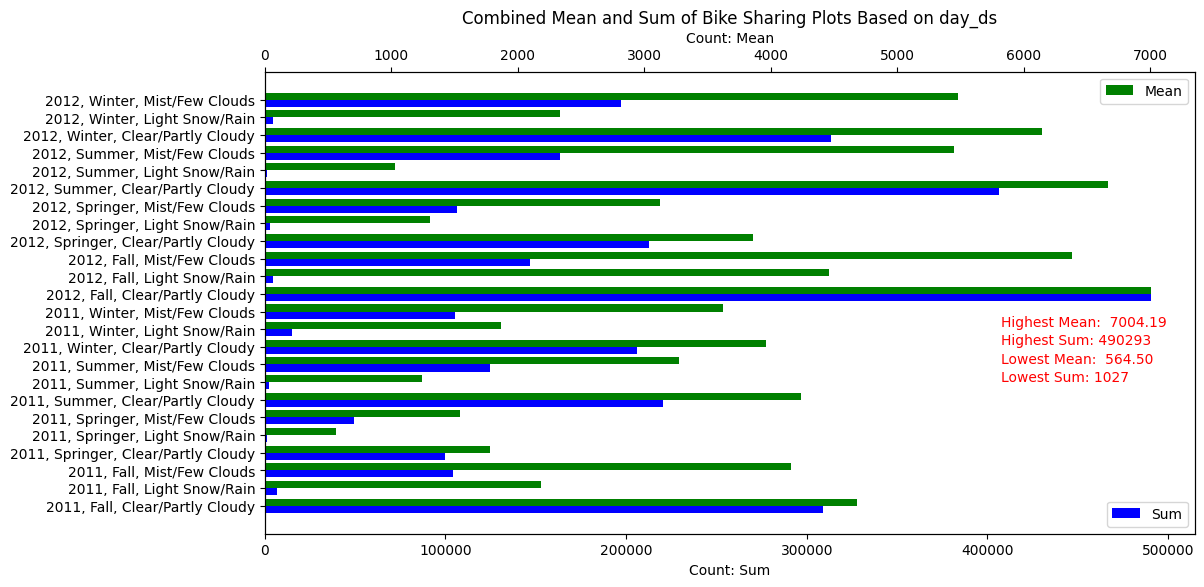

In [ ]:
# Configurating Data Frames
day_sum = day_ds.groupby(by = ["yr", "season", "weathersit"]).agg({"cnt" : "sum"})
day_yearly_sum_df = pd.DataFrame(day_sum).reset_index()
day_yearly_sum_df

day_mean = day_ds.groupby(by = ["yr", "season", "weathersit"]).agg({"cnt" : "mean"})
day_yearly_mean_df = pd.DataFrame(day_mean).reset_index()
day_yearly_mean_df

day_merged_df = pd.merge(
    left = day_yearly_mean_df,
    right = day_yearly_sum_df,
    left_on = ["yr", "season", "weathersit"],
    right_on = ["yr", "season", "weathersit"],
    suffixes = ["_mean", "_sum"]
    )

# Creating the subplot
fig, ax = plt.subplots(figsize = (12, 6))
ax2 = ax.twiny()
r1 = np.arange(len(day_merged_df))
height1 = 0.4

# Plotting the bars
ax.barh(r1, day_merged_df["cnt_sum"], height = height1, label = 'Sum', color = "blue")
ax2.barh(r1 + height1, day_merged_df["cnt_mean"], height = height1, label = 'Mean', color = "green")

# Adding labels
ax.set_xlabel("Count: Sum")
ax2.set_xlabel("Count: Mean")
ax.set_yticks(r1 + height1 / 2)
ax.set_yticklabels([f'{row.yr}, {row.season}, {row.weathersit}' for _, row in day_merged_df.iterrows()])
ax.legend(loc = "lower right")
ax2.legend(loc = "upper right")
plt.title("Combined Mean and Sum of Bike Sharing Plots Based on day_ds")

# Finding the highest and lowest value
highest_value_day_sum = max(day_yearly_sum_df["cnt"])
highest_value_day_mean = max(day_yearly_mean_df["cnt"])
lowest_value_day_sum = min(day_yearly_sum_df["cnt"])
lowest_value_day_mean = min(day_yearly_mean_df["cnt"])

# Annotating the highest and lowest value
ax.annotate(
    f'Highest Mean: {highest_value_day_mean: .2f}',
    xy = (0.97, 0.45),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

ax2.annotate(
    f'Highest Sum: {highest_value_day_sum}',
    xy = (0.953, 0.41),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

ax.annotate(
    f'Lowest Mean: {lowest_value_day_mean: .2f}',
    xy = (0.955, 0.37),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

ax2.annotate(
    f'Lowest Sum: {lowest_value_day_sum}',
    xy = (0.929, 0.33),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

### Pertanyaan 2:

Text(0.92, 0.33, 'Lowest Sum: 36')

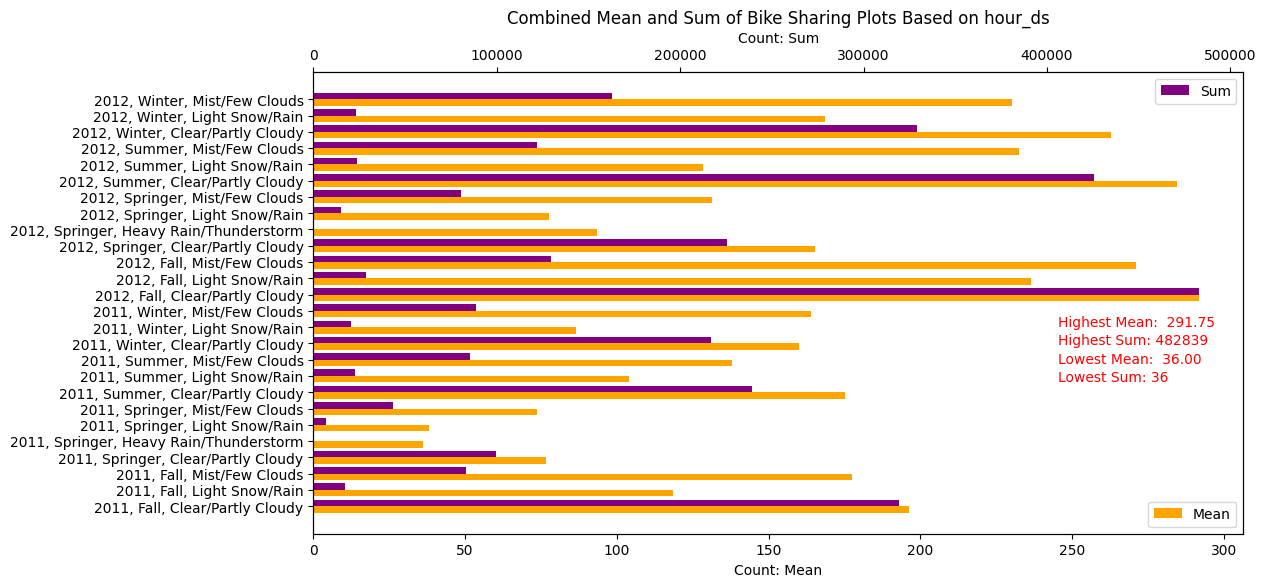

In [ ]:
# Configurating Data Frames
hour_sum = hour_ds.groupby(by = ["yr", "season", "weathersit"]).agg({"cnt" : "sum"})
hour_yearly_sum_df = pd.DataFrame(hour_sum).reset_index()
hour_yearly_sum_df

hour_mean = hour_ds.groupby(by = ["yr", "season", "weathersit"]).agg({"cnt" : "mean"})
hour_yearly_mean_df = pd.DataFrame(hour_mean).reset_index()
hour_yearly_mean_df

hour_merged_df = pd.merge(
    left = hour_yearly_mean_df,
    right = hour_yearly_sum_df,
    left_on = ["yr", "season", "weathersit"],
    right_on = ["yr", "season", "weathersit"],
    suffixes = ["_mean", "_sum"]
    )

# Creating The Subplots
fig, ax = plt.subplots(figsize = (12, 6))
ax2 = ax.twiny()
r1 = np.arange(len(hour_merged_df))
height1 = 0.4

# Plotting The Bars
ax.barh(r1, hour_merged_df["cnt_mean"], height = height1, label = 'Mean', color = "orange")
ax2.barh(r1 + height1, hour_merged_df["cnt_sum"], height = height1, label = 'Sum', color = "purple")

# Adding Labels
ax.set_xlabel("Count: Mean")
ax2.set_xlabel("Count: Sum")
ax.set_yticks(r1 + height1 / 2)
ax.set_yticklabels([f'{row.yr}, {row.season}, {row.weathersit}' for _, row in hour_merged_df.iterrows()])
ax.legend(loc = "lower right")
ax2.legend(loc = "upper right")
plt.title("Combined Mean and Sum of Bike Sharing Plots Based on hour_ds")

# Finding the highest and lowest value
highest_value_hour_sum = max(hour_yearly_sum_df["cnt"])
highest_value_hour_mean = max(hour_yearly_mean_df["cnt"])
lowest_value_hour_sum = min(hour_yearly_sum_df["cnt"])
lowest_value_hour_mean = min(hour_yearly_mean_df["cnt"])

# Annotating the highest and lowest value
ax.annotate(
    f'Highest Mean: {highest_value_hour_mean: .2f}',
    xy = (0.97, 0.45),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

ax2.annotate(
    f'Highest Sum: {highest_value_hour_sum}',
    xy = (0.962, 0.41),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

ax.annotate(
    f'Lowest Mean: {lowest_value_hour_mean: .2f}',
    xy = (0.955, 0.37),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

ax2.annotate(
    f'Lowest Sum: {lowest_value_hour_sum}',
    xy = (0.92, 0.33),
    xycoords = 'axes fraction',
    ha = 'right',
    fontsize = 10,
    color = 'red'
    )

## Conclusion

Dalam bar plot ini masih memberikan kesimpulan yang sama dengan bar plot di E.I.g yang dibentuk dari daily entries. Lalu, insight-insight yang didapatkan diantaranya:

- Dengan musim dan cuaca yang mendukung, tingkat penyewaan sepeda dapat meningkat drastis dan dapat berlaku sebaliknya.
- Hal tersebut didukung dengan data yang menunjukkan performa tertinggi dalam penyewaan sepeda terjadi pada tahun 2012 dengan musim Fall atau Gugur dan cuaca Clear/Partly Cloudy atau Cerah/Sedikit Berawan. Sedangkan performa terendah terjadi pada tahun yang sama dengan musim Springer atau Musim Semi dan cuaca Heavy Rain/Thunderstorm atau Hujan Lebat/Hujan Badai.